In [1]:
import meep as mp
import meep.adjoint as mpa
from meep import Animate2D
import numpy as np
from autograd import numpy as npa
from autograd import tensor_jacobian_product, grad
import nlopt
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from meep.materials import Ag
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import matplotlib.colors as mcolors
from scipy.integrate import trapezoid

mp.verbosity(1)
TiO2 = mp.Medium(index=2.6)
SiO2 = mp.Medium(index=1.44)
Si = mp.Medium(index=3.4)
Air = mp.Medium(index=1)

     block, center = (0,0,0)
          size (1,1,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)


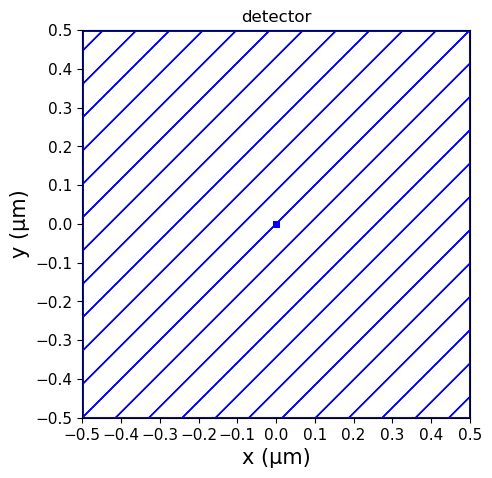

     block, center = (0,0,0)
          size (1,1,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)


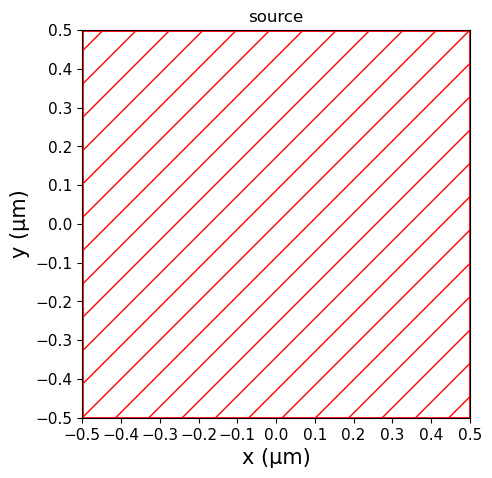

     block, center = (0,0,0)
          size (1,1,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)


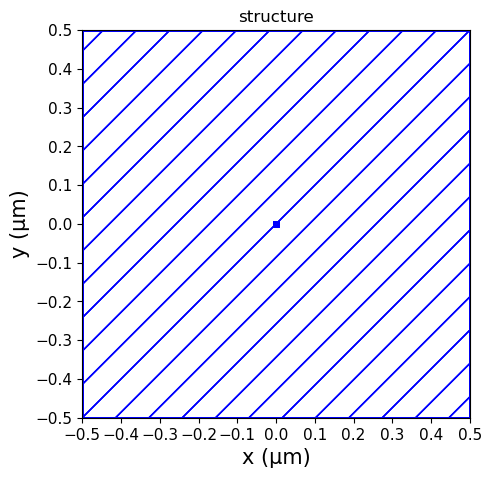

     block, center = (0,0,0)
          size (1,1,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)


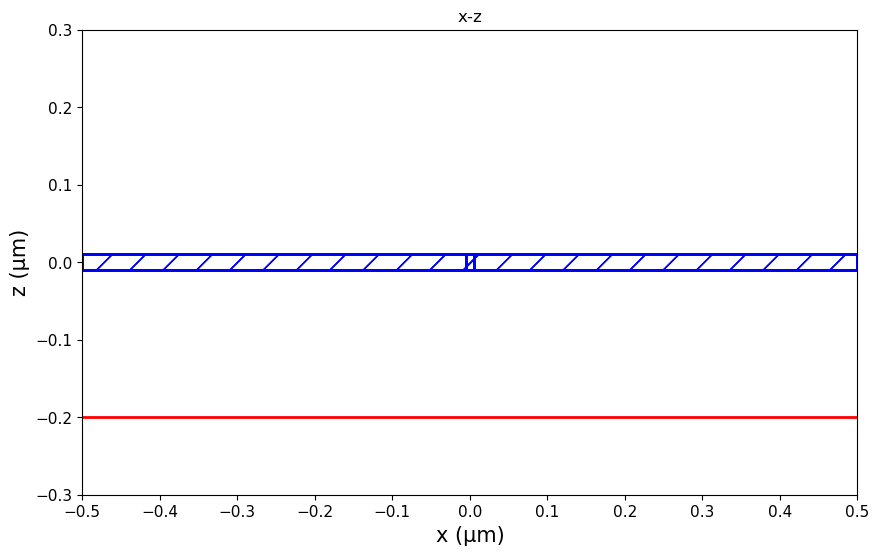

     block, center = (0,0,0)
          size (1,1,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)


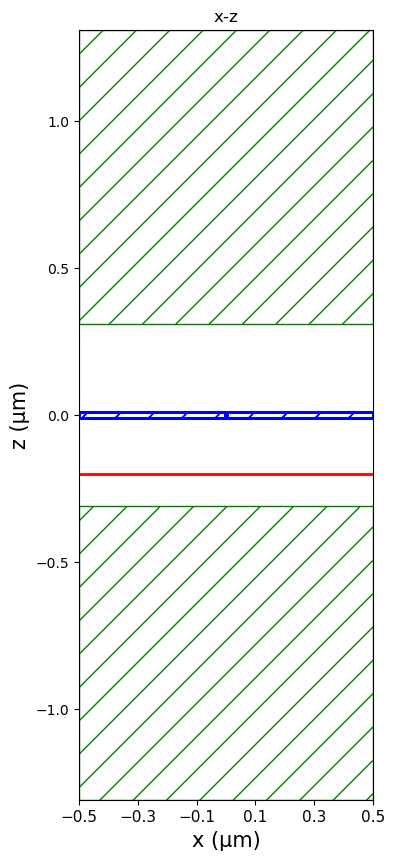

     block, center = (0,0,0)
          size (1,1,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)


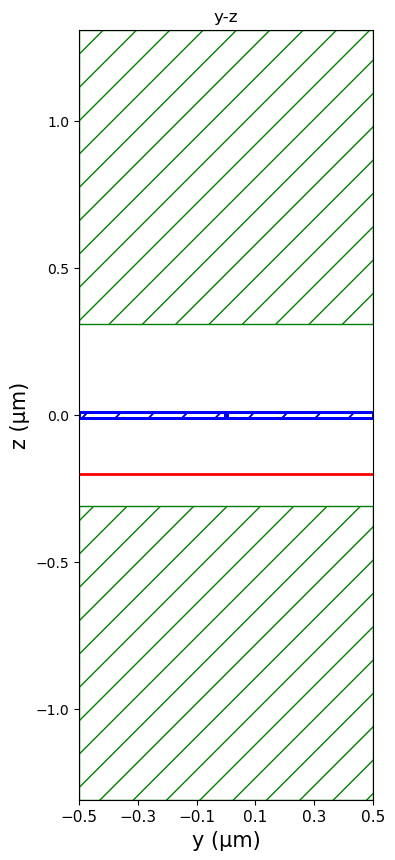

In [25]:
plt.figure(figsize=(5, 10))
plt.title('detector')
opt.plot2D(True,output_plane = mp.Volume(center=monitor_position, size=mp.Vector3(Sx,Sy,0)))
plt.xlabel("x (μm)", fontsize=15)
plt.ylabel("y (μm)", fontsize=15)
plt.xticks(np.arange(-0.5, 0.5 + 0.000001, 0.1), fontsize=11)
plt.ylim(-0.5, 0.5)
plt.yticks(np.arange(-0.5, 0.5 + 0.000001, 0.1), fontsize=11)
plt.show()
plt.close()

plt.figure(figsize=(5, 10))
plt.title('source')
opt.plot2D(True,output_plane = mp.Volume(center=source_center, size=mp.Vector3(Sx,Sy,0)))
plt.xlabel("x (μm)", fontsize=15)
plt.ylabel("y (μm)", fontsize=15)
plt.xticks(np.arange(-0.5, 0.5 + 0.000001, 0.1), fontsize=11)
plt.ylim(-0.5, 0.5)
plt.yticks(np.arange(-0.5, 0.5 + 0.000001, 0.1), fontsize=11)
plt.show()
plt.close()

plt.figure(figsize=(5, 10))
plt.title('structure')
opt.plot2D(True,output_plane = mp.Volume(center=design_region.center, size=mp.Vector3(Sx,Sy,0)))
plt.xlabel("x (μm)", fontsize=15)
plt.ylabel("y (μm)", fontsize=15)
plt.xticks(np.arange(-0.5, 0.5 + 0.000001, 0.1), fontsize=11)
plt.ylim(-0.5, 0.5)
plt.yticks(np.arange(-0.5, 0.5 + 0.000001, 0.1), fontsize=11)
plt.show()
plt.close()

plt.figure(figsize=(10, 15))
plt.title('x-z')
opt.plot2D(True,output_plane = mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(Sx,0,Sz)))
plt.xlabel("x (μm)", fontsize=15)
plt.ylabel("z (μm)", fontsize=15)
plt.xticks(np.arange(-0.5, 0.5 + 0.000001, 0.1), fontsize=11)
plt.ylim(-(0.3) ,0.3 )
plt.yticks(np.arange(-(0.3) ,0.3  + 0.000001, 0.1), fontsize=11)
plt.show()
plt.close()

plt.figure(figsize=(5, 10))
plt.title('x-z')
opt.plot2D(True,output_plane = mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(Sx,0,Sz)))
plt.xlabel("x (μm)", fontsize=15)
plt.ylabel("z (μm)", fontsize=15)
plt.xticks(np.arange(-0.5, 0.5 + 0.000001, 0.2), fontsize=11)
#plt.ylim(-Sz/2, Sz/2)
#plt.yticks(np.arange(-Sz/2, Sz/2 + 0.000001, 0.5), fontsize=11)
plt.show()
plt.close()

plt.figure(figsize=(5, 10))
plt.title('y-z')
opt.plot2D(True,output_plane = mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(0,Sy,Sz)))
plt.xlabel("y (μm)", fontsize=15)
plt.ylabel("z (μm)", fontsize=15)
plt.xticks(np.arange(-0.5, 0.5 + 0.000001, 0.2), fontsize=11)
plt.show()
plt.close()

In [4]:
evaluation_history = np.load('Post_evaluation_history.npy')
beta_A  = np.load("Post_beta_scale_array.npy")
eta_A   = np.load("Post_eta_i_array.npy")
cur_A   = np.load("Post_cur_beta_array.npy")
x_A     = np.load("Post_x_array.npy")

     block, center = (0,0,0)
          size (1,1,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)


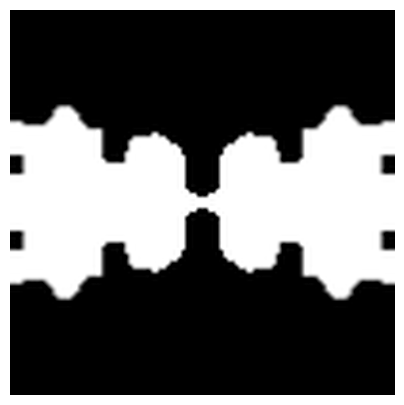

In [5]:
opt.update_design([mapping(x_A, eta_A, cur_A/beta_A)])  # cur_beta/beta_scale is the final beta in the optimization.
plt.figure(figsize=(5,5))
ax = plt.gca()
opt.plot2D(
    False,
    ax=ax,
    plot_sources_flag=False,
    plot_monitors_flag=False,
    plot_boundaries_flag=False,
    output_plane = mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(design_region_x_width, design_region_y_height, 0))
)
circ = Circle((2, 2), minimum_length / 2)
ax.add_patch(circ)
ax.axis("off")
plt.show()
plt.close()